In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px
import seaborn as sns
churn_data = pd.read_csv('data/churn.csv')
churn_data.drop('RowNumber', axis=1, inplace=True)

In [4]:
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


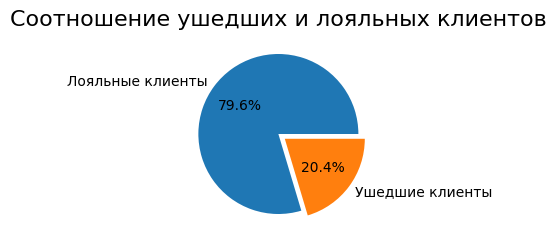

In [11]:
exited = churn_data.groupby(by='Exited')['Surname'].count()
fig = plt.figure(figsize=(2, 2))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0, 0.1],
);
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16);

На графике мы видим, что каждый пятый клиент банка закрыл счет.

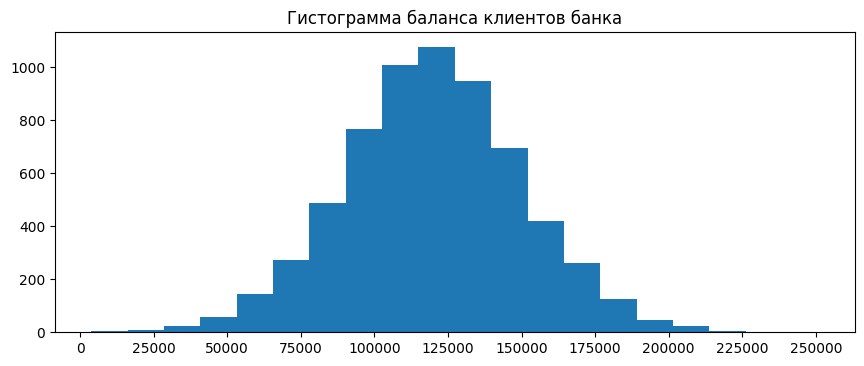

In [40]:
high_balance = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(8, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x=high_balance['Balance'],
    bins=20,
);
axes.set_title('Гистограмма баланса клиентов банка');
axes.set_xticks(range(0, 275000, 25000));

На данном графике мы видим, что среди непустых счетов большинство клиентов банка хранит на счете около 125 тысяч. Здесь мы видим нормальное распределение без "пеньков" с максимальной суммой, хранящейся на счете в 250 тысяч. Можно сделать вывод, что в банке отсутствуют вип клиенты с крупными средствами на счетах, банк можно считать "народным" и популярным среди среднего класса.